<a href="https://colab.research.google.com/github/JakeOh/202105_itw_bd26/blob/main/lab_da/da13_reshape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DataFrame 모양(shape) 변경

* wide (columns) --> long (rows)
* long (rows) ---> wide (columns)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# stack vs unstack

In [2]:
df = pd.DataFrame(data=np.arange(1, 7).reshape((2, 3)),
                  columns=['a', 'b', 'c'], 
                  index=['A', 'B'])
df

,a,b,c
A,1,2,3
B,4,5,6


In [3]:
df_stacked = df.stack()
df_stacked  #> 컬럼 이름들이 index로 바뀜

A  a    1
   b    2
   c    3
B  a    4
   b    5
   c    6
dtype: int64

In [4]:
df_stacked.unstack()  #> 가장 마지막 레벨의 인덱스가 컬럼 이름으로 바뀜.

,a,b,c
A,1,2,3
B,4,5,6


In [5]:
df_stacked.unstack(level=0)  #> 첫번째 레벨의 인덱스가 컬럼 이름으로 바뀜.

,A,B
a,1,4
b,2,5
c,3,6


In [6]:
df = pd.DataFrame(data=np.arange(1, 13).reshape((2, 6)),
                  columns=[['Lunch'] * 3 + ['Dinner'] * 3, 
                           ['Fri', 'Sat', 'Sun'] * 2])
df

Lunch         Dinner        
    Fri Sat Sun    Fri Sat Sun
0     1   2   3      4   5   6
1     7   8   9     10  11  12

In [7]:
df_stacked1 = df.stack()  #> 가장 마지막 레벨의 컬럼 이름들을 index로 변환
df_stacked1

Dinner  Lunch
0 Fri       4      1
  Sat       5      2
  Sun       6      3
1 Fri      10      7
  Sat      11      8
  Sun      12      9

In [8]:
df_stacked1.unstack()  #> 가장 마지막 레벨의 인덱스를 컬럼 이름들로 변환

Dinner         Lunch        
     Fri Sat Sun   Fri Sat Sun
0      4   5   6     1   2   3
1     10  11  12     7   8   9

In [9]:
df_stacked2 = df.stack(level=0)
df_stacked2

Fri  Sat  Sun
0 Dinner    4    5    6
  Lunch     1    2    3
1 Dinner   10   11   12
  Lunch     7    8    9

In [10]:
df_stacked2.unstack()

Fri          Sat          Sun      
  Dinner Lunch Dinner Lunch Dinner Lunch
0      4     1      5     2      6     3
1     10     7     11     8     12     9

# pivot vs melt

In [11]:
df = pd.DataFrame({
    'time': ['Lunch'] * 3 + ['Dinner'] * 3,
    'day': ['Fri', 'Sat', 'Sun'] * 2,
    'tip': np.arange(1, 7),
    'total_bill': np.arange(10, 70, 10)
})
df

,time,day,tip,total_bill
0,Lunch,Fri,1,10
1,Lunch,Sat,2,20
2,Lunch,Sun,3,30
3,Dinner,Fri,4,40
4,Dinner,Sat,5,50
5,Dinner,Sun,6,60


`pd.DataFrame.pivot()` 메서드 파라미터:

* `index`: pivoting한 데이터프레임에서, row index로 사용할 컬럼(들)의 이름.
* `columns`: pivoting한 데이터프레임에서, 컬럼 이름으로 사용할 컬럼(들)의 이름.
* `values`: pivoting한 데이터프레임의 각 셀에 채울 값들이 있는 컬럼(들)의 이름.


In [12]:
df.pivot(index='time', columns='day', values='tip')

day,Fri,Sat,Sun
time,,,
Dinner,4,5,6
Lunch,1,2,3


In [13]:
df.pivot(index='day', columns='time', values='tip')

time,Dinner,Lunch
day,,
Fri,4,1
Sat,5,2
Sun,6,3


In [14]:
df

,time,day,tip,total_bill
0,Lunch,Fri,1,10
1,Lunch,Sat,2,20
2,Lunch,Sun,3,30
3,Dinner,Fri,4,40
4,Dinner,Sat,5,50
5,Dinner,Sun,6,60


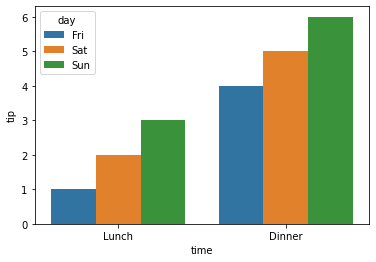

In [15]:
sns.barplot(data=df, x='time', y='tip', hue='day')
plt.show()

In [16]:
df = pd.DataFrame({
    'gender': ['Female', 'Male'],
    'Lunch': [10, 5],
    'Dinner': [20, 30]
})
df

,gender,Lunch,Dinner
0,Female,10,20
1,Male,5,30


`pd.DataFrame.melt` 메서드 파라미터:

* `id_vars`: melting될 때, 컬럼으로 유지가 될 컬럼 이름.
    * `id_vars`로 설정하지 않은 컬럼(변수)들은 `variable` 컬럼으로 melting됨.
    * `id_vars`로 설정하지 않은 컬럼의 모든 셀에 있는 값들은 `value` 컬럼으로 melting됨.
* `var_name`: `variable` 컬럼의 이름으로 사용할 문자열.
* `value_name`: 'value` 컬럼의 이름으로 사용할 문자열.

In [17]:
df.melt(id_vars='gender')

,gender,variable,value
0,Female,Lunch,10
1,Male,Lunch,5
2,Female,Dinner,20
3,Male,Dinner,30


In [18]:
df.melt(id_vars='gender', var_name='time', value_name='count')

,gender,time,count
0,Female,Lunch,10
1,Male,Lunch,5
2,Female,Dinner,20
3,Male,Dinner,30


# pivot_table

In [19]:
tips = sns.load_dataset('tips')

In [20]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [21]:
# 성별 tip의 평균
tips.groupby('sex')['tip'].mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [22]:
tips.pivot_table(values='tip', index='sex')

,tip
sex,
Male,3.089618
Female,2.833448


In [23]:
# 성별, 흡연여부별 tip의 평균
result = tips.groupby(['sex', 'smoker'])['tip'].mean()
result

sex     smoker
Male    Yes       3.051167
        No        3.113402
Female  Yes       2.931515
        No        2.773519
Name: tip, dtype: float64

In [24]:
result = result.reset_index()
result

,sex,smoker,tip
0,Male,Yes,3.051167
1,Male,No,3.113402
2,Female,Yes,2.931515
3,Female,No,2.773519


In [25]:
result.pivot(index='sex', columns='smoker', values='tip')

smoker,Yes,No
sex,,
Male,3.051167,3.113402
Female,2.931515,2.773519


`pd.DataFrame.pivot_table` 메서드 파라미터:

* `values`: pivoting해서 각 셀에 값으로 설정할 변수(들)
* `index`: pivoting할 때 row index로 설정할 변수(들)
* `columns`: pivoting할 때 컬럼 이름으로 설정할 변수(들)
* `aggfunc`: 집계 함수(aggregating function). 기본값은 'mean'


In [26]:
tips.pivot_table(values='tip', index='sex', columns='smoker', aggfunc='mean')

smoker,Yes,No
sex,,
Male,3.051167,3.113402
Female,2.931515,2.773519


In [27]:
# 성별, 요일별, 시간별 tip의 평균
result = tips.groupby(['sex', 'day', 'time'], as_index=False)['tip'].mean()
result

,sex,day,time,tip
0,Male,Thur,Lunch,2.980333
1,Male,Thur,Dinner,NaN
2,Male,Fri,Lunch,1.900000
3,Male,Fri,Dinner,3.032857
4,Male,Sat,Lunch,NaN
5,Male,Sat,Dinner,3.083898
6,Male,Sun,Lunch,NaN
7,Male,Sun,Dinner,3.220345
8,Female,Thur,Lunch,2.561935
9,Female,Thur,Dinner,3.000000


In [28]:
result.pivot(index='sex', columns=['time', 'day'], values='tip')

time,Lunch,Dinner,Lunch,Dinner,Lunch,Dinner,Lunch,Dinner
day,Thur,Thur,Fri,Fri,Sat,Sat,Sun,Sun
sex,,,,,,,,
Male,2.980333,NaN,1.900,3.032857,NaN,3.083898,NaN,3.220345
Female,2.561935,3.0,2.745,2.810000,NaN,2.801786,NaN,3.367222


In [29]:
tips.pivot_table(values='tip', index='sex', columns=['time', 'day'])

time       Lunch        Dinner                              
day         Thur    Fri   Thur       Fri       Sat       Sun
sex                                                         
Male    2.980333  1.900    NaN  3.032857  3.083898  3.220345
Female  2.561935  2.745    3.0  2.810000  2.801786  3.367222

* 성별 tip의 최댓값, 최솟값, 중앙값

In [35]:
tips.groupby('sex')['tip'].agg(['max', 'min', 'median'])

,max,min,median
sex,,,
Male,10.0,1.0,3.00
Female,6.5,1.0,2.75


In [36]:
tips.pivot_table(values='tip', index='sex', aggfunc=['max', 'min', 'median'])

,max,min,median
,tip,tip,tip
sex,,,
Male,10.0,1.0,3.00
Female,6.5,1.0,2.75


* 성별, 요일별 total_bill의 최댓값, 최솟값, 중앙값

In [38]:
result = tips.groupby(['sex', 'day'])['total_bill'].agg(['max', 'min', 'median'])
result

max   min  median
sex    day                      
Male   Thur  41.19  7.51  16.975
       Fri   40.17  8.58  17.215
       Sat   50.81  7.74  18.240
       Sun   48.17  7.25  20.725
Female Thur  43.11  8.35  13.785
       Fri   22.75  5.75  15.380
       Sat   44.30  3.07  18.360
       Sun   35.26  9.60  17.410

In [39]:
result.unstack()

max                        min  ...        median                       
day      Thur    Fri    Sat    Sun  Thur  ...   Sun    Thur     Fri    Sat     Sun
sex                                       ...                                     
Male    41.19  40.17  50.81  48.17  7.51  ...  7.25  16.975  17.215  18.24  20.725
Female  43.11  22.75  44.30  35.26  8.35  ...  9.60  13.785  15.380  18.36  17.410

[2 rows x 12 columns]

In [41]:
tips.pivot_table(values='total_bill', index='sex', columns='day',
                 aggfunc=['max', 'min', 'median'])

max                        min  ...        median                       
day      Thur    Fri    Sat    Sun  Thur  ...   Sun    Thur     Fri    Sat     Sun
sex                                       ...                                     
Male    41.19  40.17  50.81  48.17  7.51  ...  7.25  16.975  17.215  18.24  20.725
Female  43.11  22.75  44.30  35.26  8.35  ...  9.60  13.785  15.380  18.36  17.410

[2 rows x 12 columns]

In [40]:
result.unstack(level=0)

max          min         median        
sex    Male Female  Male Female    Male  Female
day                                            
Thur  41.19  43.11  7.51   8.35  16.975  13.785
Fri   40.17  22.75  8.58   5.75  17.215  15.380
Sat   50.81  44.30  7.74   3.07  18.240  18.360
Sun   48.17  35.26  7.25   9.60  20.725  17.410

In [42]:
tips.pivot_table(values='total_bill', index='day', columns='sex',
                 aggfunc=['max', 'min', 'median'])

max          min         median        
sex    Male Female  Male Female    Male  Female
day                                            
Thur  41.19  43.11  7.51   8.35  16.975  13.785
Fri   40.17  22.75  8.58   5.75  17.215  15.380
Sat   50.81  44.30  7.74   3.07  18.240  18.360
Sun   48.17  35.26  7.25   9.60  20.725  17.410

* 성별, 흡연여부별, 요일별 tip의 중앙값

In [44]:
result = tips.groupby(['sex', 'smoker', 'day'])['tip'].median()
result

sex     smoker  day 
Male    Yes     Thur    2.780
                Fri     2.600
                Sat     3.000
                Sun     3.500
        No      Thur    2.405
                Fri     2.500
                Sat     2.860
                Sun     3.000
Female  Yes     Thur    2.500
                Fri     2.500
                Sat     2.500
                Sun     3.500
        No      Thur    2.000
                Fri     3.125
                Sat     2.750
                Sun     3.500
Name: tip, dtype: float64

In [45]:
result.unstack()

day             Thur    Fri   Sat  Sun
sex    smoker                         
Male   Yes     2.780  2.600  3.00  3.5
       No      2.405  2.500  2.86  3.0
Female Yes     2.500  2.500  2.50  3.5
       No      2.000  3.125  2.75  3.5

In [46]:
tips.pivot_table(values='tip', index=['sex', 'smoker'], columns='day', aggfunc='median')

day             Thur    Fri   Sat  Sun
sex    smoker                         
Male   Yes     2.780  2.600  3.00  3.5
       No      2.405  2.500  2.86  3.0
Female Yes     2.500  2.500  2.50  3.5
       No      2.000  3.125  2.75  3.5

In [48]:
result.unstack(level=[0, 1])

sex     Male        Female       
smoker   Yes     No    Yes     No
day                              
Thur    2.78  2.405    2.5  2.000
Fri     2.60  2.500    2.5  3.125
Sat     3.00  2.860    2.5  2.750
Sun     3.50  3.000    3.5  3.500

In [49]:
tips.pivot_table(values='tip', index='day', columns=['sex', 'smoker'], aggfunc='median')

sex     Male        Female       
smoker   Yes     No    Yes     No
day                              
Thur    2.78  2.405    2.5  2.000
Fri     2.60  2.500    2.5  3.125
Sat     3.00  2.860    2.5  2.750
Sun     3.50  3.000    3.5  3.500

* 성별, 흡연여부별, 요일별, 시간별 tip의 중앙값

In [50]:
result = tips.groupby(['sex', 'smoker', 'day', 'time'])['tip'].median()
result

sex     smoker  day   time  
Male    Yes     Thur  Lunch     2.780
                      Dinner      NaN
                Fri   Lunch     1.920
                      Dinner    3.000
                Sat   Lunch       NaN
                      Dinner    3.000
                Sun   Lunch       NaN
                      Dinner    3.500
        No      Thur  Lunch     2.405
                      Dinner      NaN
                Fri   Lunch       NaN
                      Dinner    2.500
                Sat   Lunch       NaN
                      Dinner    2.860
                Sun   Lunch       NaN
                      Dinner    3.000
Female  Yes     Thur  Lunch     2.500
                      Dinner      NaN
                Fri   Lunch     2.500
                      Dinner    2.750
                Sat   Lunch       NaN
                      Dinner    2.500
                Sun   Lunch       NaN
                      Dinner    3.500
        No      Thur  Lunch     2.000
                     

In [51]:
result.unstack(level=[2, 3])

day             Thur          Fri          Sat          Sun       
time           Lunch Dinner Lunch Dinner Lunch Dinner Lunch Dinner
sex    smoker                                                     
Male   Yes     2.780    NaN  1.92   3.00   NaN   3.00   NaN    3.5
       No      2.405    NaN   NaN   2.50   NaN   2.86   NaN    3.0
Female Yes     2.500    NaN  2.50   2.75   NaN   2.50   NaN    3.5
       No      2.000    3.0  3.00   3.25   NaN   2.75   NaN    3.5

In [52]:
tips.pivot_table(values='tip', index=['sex', 'smoker'], columns=['day', 'time'],
                 aggfunc='median')

day             Thur          Fri           Sat    Sun
time           Lunch Dinner Lunch Dinner Dinner Dinner
sex    smoker                                         
Male   Yes     2.780    NaN  1.92   3.00   3.00    3.5
       No      2.405    NaN   NaN   2.50   2.86    3.0
Female Yes     2.500    NaN  2.50   2.75   2.50    3.5
       No      2.000    3.0  3.00   3.25   2.75    3.5